# 神经网络baseline

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
x_train.astype(np.float32).reshape(-1, 784).shape

(55000, 784)

In [4]:
# 标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(55000, -1))
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(5000, -1))

x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(10000, -1))

In [5]:
def make_dataset(data, target, epochs, batch_size, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((data, target))
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs).batch(batch_size).prefetch(50)
    return dataset

batch_size = 64
epochs = 20
train_dataset = make_dataset(x_train_scaled, y_train, epochs, batch_size)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [8]:
eval_dataset = make_dataset(x_valid_scaled, y_valid, epochs=1, batch_size=32, shuffle=False)

In [9]:
x_train_scaled.shape[0]

55000

In [10]:
x_train_scaled.shape[1]

784

In [11]:
history = model.fit(train_dataset, 
         steps_per_epoch=x_train_scaled.shape[0] // batch_size,
         epochs=10,
         validation_data=eval_dataset)

Epoch 1/10
859/859 [==============================] - 4s 4ms/step - loss: 0.4404 - accuracy: 0.8433 - val_loss: 0.3612 - val_accuracy: 0.8710
Epoch 2/10
859/859 [==============================] - 4s 4ms/step - loss: 0.3235 - accuracy: 0.8803 - val_loss: 0.3498 - val_accuracy: 0.8736
Epoch 3/10
859/859 [==============================] - 4s 4ms/step - loss: 0.2877 - accuracy: 0.8927 - val_loss: 0.3356 - val_accuracy: 0.8854
Epoch 4/10
859/859 [==============================] - 3s 4ms/step - loss: 0.2566 - accuracy: 0.9028 - val_loss: 0.3185 - val_accuracy: 0.8910
Epoch 5/10
859/859 [==============================] - 3s 4ms/step - loss: 0.2332 - accuracy: 0.9118 - val_loss: 0.3544 - val_accuracy: 0.8788
Epoch 6/10
859/859 [==============================] - 3s 4ms/step - loss: 0.2183 - accuracy: 0.9178 - val_loss: 0.3378 - val_accuracy: 0.8912
Epoch 7/10
859/859 [==============================] - 3s 4ms/step - loss: 0.1979 - accuracy: 0.9235 - val_loss: 0.3565 - val_accuracy: 0.8870
Epoch 

In [12]:
model.evaluate(eval_dataset)

157/157 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8896


[0.36186549067497253, 0.8895999789237976]

# fashion_mnist_cnn

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [14]:
def make_dataset(data, target, epochs, batch_size, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((data, target))
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs).batch(batch_size).prefetch(50)
    return dataset

batch_size = 64
epochs = 20
train_dataset = make_dataset(x_train_scaled, y_train, epochs, batch_size)

In [15]:
model = keras.models.Sequential()
# 卷积
model.add(keras.layers.Conv2D(filters = 32, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu',
                              # batch_size, height, width, channels
                              input_shape=(28, 28, 1))) # (28, 28, 32)

model.add(keras.layers.Conv2D(filters = 32, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu'))
# 池化
model.add(keras.layers.MaxPool2D()) # (14, 14, 32)

# 卷积
model.add(keras.layers.Conv2D(filters = 64, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu')) # (14, 14, 64)
model.add(keras.layers.Conv2D(filters = 64, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu'))
# 池化
model.add(keras.layers.MaxPool2D()) # (7, 7, 64)

# 卷积
model.add(keras.layers.Conv2D(filters = 128, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu')) # (7, 7, 128)
model.add(keras.layers.Conv2D(filters = 128, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='relu')) # (7, 7, 128)
# 池化, 奇数值向下取整
model.add(keras.layers.MaxPooling2D()) # (3, 3, 128)


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [17]:
eval_dataset = make_dataset(x_valid_scaled, y_valid, epochs=1, batch_size=32, shuffle=False)

In [18]:
history = model.fit(train_dataset, 
         steps_per_epoch=x_train_scaled.shape[0] // batch_size,
         epochs=10,
         validation_data=eval_dataset)

Epoch 1/10
859/859 [==============================] - 102s 118ms/step - loss: 0.4426 - accuracy: 0.8376 - val_loss: 0.2986 - val_accuracy: 0.8920
Epoch 2/10
859/859 [==============================] - 100s 117ms/step - loss: 0.2600 - accuracy: 0.9042 - val_loss: 0.2505 - val_accuracy: 0.9100
Epoch 3/10
859/859 [==============================] - 103s 119ms/step - loss: 0.2153 - accuracy: 0.9204 - val_loss: 0.2121 - val_accuracy: 0.9184
Epoch 4/10
859/859 [==============================] - 100s 117ms/step - loss: 0.1887 - accuracy: 0.9306 - val_loss: 0.2204 - val_accuracy: 0.9224
Epoch 5/10
859/859 [==============================] - 99s 115ms/step - loss: 0.1678 - accuracy: 0.9378 - val_loss: 0.2219 - val_accuracy: 0.9238
Epoch 6/10
859/859 [==============================] - 99s 115ms/step - loss: 0.1461 - accuracy: 0.9449 - val_loss: 0.2163 - val_accuracy: 0.9248
Epoch 7/10
859/859 [==============================] - 100s 116ms/step - loss: 0.1281 - accuracy: 0.9511 - val_loss: 0.2205 - v

In [19]:
model.evaluate(eval_dataset)

157/157 [==============================] - 2s 11ms/step - loss: 0.2821 - accuracy: 0.9270


[0.2820540964603424, 0.9269999861717224]

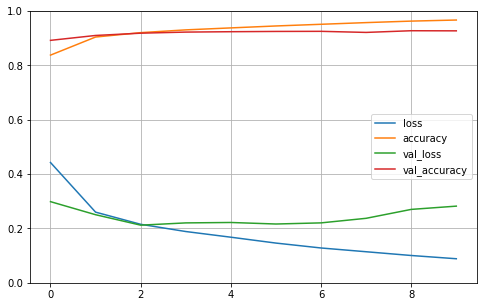

In [20]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

# fashion_mnist_cnn-selu

In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
# 标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
def make_dataset(data, target, epochs, batch_size, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((data, target))
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs).batch(batch_size).prefetch(50)
    return dataset

batch_size = 64
epochs = 20
train_dataset = make_dataset(x_train_scaled, y_train, epochs, batch_size)
model = keras.models.Sequential()
# 卷积
model.add(keras.layers.Conv2D(filters = 32, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='selu',
                              # batch_size, height, width, channels
                              input_shape=(28, 28, 1))) # (28, 28, 32)

model.add(keras.layers.Conv2D(filters = 32, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='selu'))
# 池化
model.add(keras.layers.MaxPool2D()) # (14, 14, 32)

model.add(keras.layers.Conv2D(filters = 64, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='selu')) # (14, 14, 64)
model.add(keras.layers.Conv2D(filters = 64, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='selu'))
# 池化
model.add(keras.layers.MaxPool2D()) # (7, 7, 64)
model.add(keras.layers.Conv2D(filters = 128, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='selu')) # (7, 7, 128)
model.add(keras.layers.Conv2D(filters = 128, 
                              kernel_size = 3, 
                              padding = 'same',
                              activation='selu')) # (7, 7, 128)
# 池化, 向下取整
model.add(keras.layers.MaxPooling2D()) # (3, 3, 128)

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='selu', input_shape=(784,)))
model.add(keras.layers.Dense(256, activation='selu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
eval_dataset = make_dataset(x_valid_scaled, y_valid, epochs=1, batch_size=32, shuffle=False)

In [ ]:
history = model.fit(train_dataset, 
         steps_per_epoch=x_train_scaled.shape[0] // batch_size,
         epochs=10,
         validation_data=eval_dataset)

In [21]:
test_dataset = make_dataset(x_test_scaled, y_test, epochs=1, batch_size=128, shuffle=True)

In [22]:
model.evaluate(test_dataset)

79/79 [==============================] - 3s 34ms/step - loss: 0.2871 - accuracy: 0.9241


[0.28709742426872253, 0.9240999817848206]

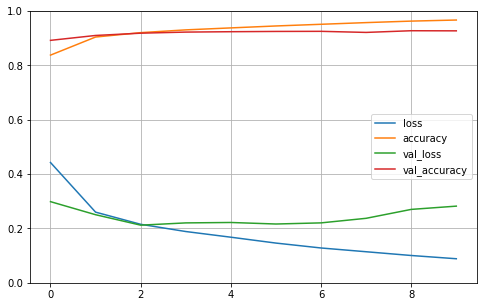

In [23]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)